In [2]:
import pandas as pd
import numpy as np
import cv2
import pytesseract
custom_config = r' — oem 3 — psm 6'
from matplotlib import pyplot as plt

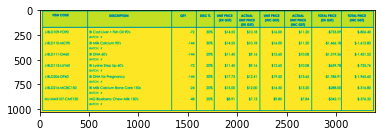

In [3]:
# load raw image
img = cv2.imread(r'C:\Users\siva\Documents\coca\images\crop returnauthority04203794fullreturn-1.png',0)
# display raw image
plt.imshow(img)
plt.show()

C:\Users\siva\Documents\coca\images\crop returnauthority04203794fullreturn-1.png


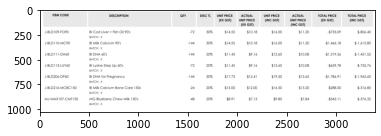

In [4]:
import cv2
import matplotlib.pyplot as plt
import glob
import os
def remove_lines(image_path,outdir):
    image = cv2.imread(image_path)
    result = image.copy()
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Remove horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
    remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    
    cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result, [c], -1, (255,255,255), 5)


    # Remove vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,50))
    remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    #remove_vertical =cv2.dilate(remove_vertical , vertical_kernel, iterations=2)
    cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(result, [c], -1, (255,255,255), 5)

    cv2.imwrite(os.path.join(outdir,os.path.basename(image_path)), result)
    plt.imshow(result)
for jpgfile in glob.glob(r'C:\Users\siva\Documents\coca\images\crop returnauthority04203794fullreturn-1.png'):
    print(jpgfile)
    remove_lines(jpgfile, r'C:\Users\siva\Documents\coca\images\crop returnauthority04203794fullreturn-1.png')

In [8]:
import cv2

# Load image, convert to grayscale, Otsu's threshold
image = cv2.imread(r'C:\Users\siva\Documents\coca\images\crop returnauthority04203794fullreturn-1.png')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Detect horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)

# Detect vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (36,255,12), 2)


cv2.imshow(image)
#cv2.waitKey()

plt.imshow(image)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [18]:
def sharpen_image(im):
    kernel = np.ones((3,3),np.float32)/90
    im = cv2.filter2D(im,-1,kernel)
    return im

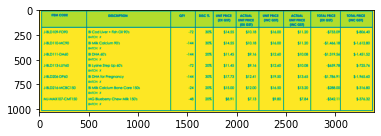

In [19]:
img = sharpen_image(img)
# display sharpened image
plt.imshow(img)
plt.show()

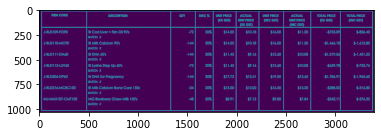

In [20]:
# apply image thresholding
img_thresh = cv2.adaptiveThreshold(img,    
          255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# invert the image, 255 is the maximum value
img_thresh = 255 -img_thresh
# display image
plt.imshow(img_thresh)
plt.show()

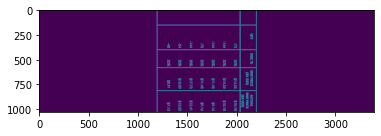

In [21]:
def align_text(im):
  coords = np.column_stack(np.where(img_thresh > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  h,w = img.shape
  center = (w // 2, h // 2)
  
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(img_thresh, M, (w, h),
            flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return rotated
# align image text
img = align_text(img)
# display rotated and aligned image
plt.imshow(img)
plt.show()

In [22]:
# split text into rows
# find sum of column values, row-wise
a = np.sum(img == 255, axis=1)
rows = []
seg = []
for i in range(len(a)):
  if a[i] > 0:
    seg.append(i)
  if (a[i] == 0) & (len(seg) >= 5):
    rows.append(seg)
    seg = []
  if len(seg) > 0:
    rows.append(seg)
# number of row segments
len(rows)

1029

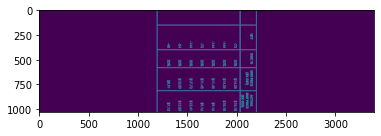

In [23]:
plt.imshow(img[rows[0][0]:rows[0][-1],:])
plt.show()

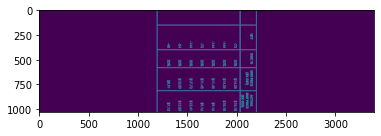

In [24]:
plt.imshow(img[rows[3][0]:rows[3][-1],:])
plt.show()

In [25]:
for i in range(len(rows)):
     print(pytesseract.image_to_string(img[rows[i][0]:rows[i][-1],:],   
        config=custom_config))

UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

$9.16

$9.16

$12.41

$12.00

$7.13


UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

$9.16

$9.16

$12.41

$12.00

$7.13


UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

$9.16

$9.16

$12.41

$12.00

$7.13


UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

$9.16

$9.16

$12.41

$12.00

$7.13


UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

$9.16

$9.16

$12.41

$12.00

$7.13


UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

$9.16

$9.16

$12.41

$12.00

$7.13


UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

$9.16

$9.16

$12.41

$12.00

$7.13


UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

$9.16

$9.16

$12.41

$12.00

$7.13


UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

$9.16

$9.16

$12.41

$12.00

$7.13


UNIT PRICE ACTUAL
(EX GST) | UNIT PRICE
(EX GST)

$10.18

$10.18

KeyboardInterrupt: 

In [ ]:
!pip install paddle ocr

In [27]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd =  r"C:\Program Files\Tesseract-OCR\tesseract.exe"

img=Image.open(r'C:\Users\siva\Documents\coca\images\crop returnauthority04203794fullreturn-1.png')

text = pytesseract.image_to_string(img, lang = 'eng')


print(text)

ITEM CODE

D109-FO90

D110-MC90

D111-DA60

LD113-LUY60

D206-DP60

LD216-MCBC150

MJ-MAX107-CMT150

DESCRIPTION

BI Cod Liver + Fish Oil 90's
BATCH: X

BI Milk Calcium 90's
BATCH: X

BI DHA 60's
BATCH: X

BI Lysine Step Up 60's
BATCH: X

BI DHA for Pregnancy

BATCH: X

BI Milk Calcium Bone Care 150s
BATCH: X

MG Blueberry Chew Milk 150's
BATCH: X

UNIT PRICE
(EX GST)

ACTUAL
UNIT PRICE
(EX GST)

UNIT PRICE
(INC GST)

ACTUAL TOTAL PRICE TOTAL PRICE
UNIT PRICE (EX GST) (INC GST)
(INC GST)

$-806.40

$-1,612.80

$-1,451.52

$-725.76

$-1,965.60

$-316.80

$-376.32




In [32]:
import cv2

image = cv2.imread(r'C:\Users\siva\Documents\coca\images\crop returnauthority04203794fullreturn-1.png',0)
thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cv2.fillPoly(thresh, cnts, [0,0,0])

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,45))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cv2.fillPoly(thresh, cnts, [0,0,0])

result = 255 - thresh

cv2.imshow('thresh', thresh)
cv2.imshow('result', result)
cv2.waitKey()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1268: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [3]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd=r"C:\ProgramFiles\Tesseract-OCR\tesseract.exe"

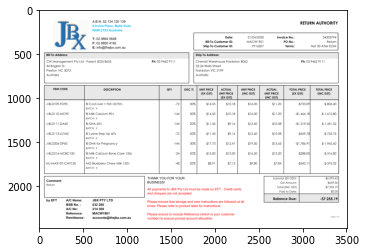

In [4]:
# Reading image
img = cv2.imread(r'C:\Users\siva\Documents\coca\images\returnauthority04203794fullreturn-1.png')

# Convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the Output
plt.imshow(img)
plt.show()

In [6]:
import cv2
import pytesseract
from matplotlib import pyplot as plt
# Detect texts from image
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

texts = pytesseract.image_to_string(img)

#print(texts)

In [7]:
# Return each detected character and their bounding boxes. 
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
boxes = pytesseract.image_to_boxes(img)

print(boxes)

A 608 2336 633 2363 0
. 636 2336 640 2340 0
B 646 2336 666 2363 0
. 671 2336 675 2340 0
N 682 2336 703 2363 0
. 709 2336 713 2340 0
5 728 2336 745 2362 0
2 748 2336 766 2363 0
1 782 2336 792 2363 0
3 801 2336 818 2363 0
4 820 2336 839 2363 0
1 855 2336 865 2363 0
2 873 2336 891 2363 0
0 894 2336 911 2363 0
1 927 2336 937 2363 0
3 946 2336 963 2363 0
9 967 2336 984 2363 0
R 2976 2315 2998 2349 0
E 3004 2315 3023 2349 0
T 3026 2315 3045 2349 0
U 3049 2314 3072 2349 0
R 3080 2315 3102 2349 0
N 3107 2315 3135 2349 0
A 3153 2315 3186 2349 0
U 3192 2314 3215 2349 0
T 3219 2315 3238 2349 0
H 3242 2315 3267 2349 0
O 3273 2314 3309 2350 0
R 3294 2314 3320 2350 0
I 3315 2315 3337 2349 0
T 3342 2315 3372 2349 0
Y 3375 2315 3401 2349 0
5 610 2287 627 2313 0
I 641 2287 647 2313 0
r 649 2287 667 2313 0
v 651 2287 683 2306 0
i 686 2287 691 2313 0
n 696 2287 713 2306 0
e 717 2287 735 2306 0
P 749 2287 769 2313 0
l 773 2287 778 2313 0
a 782 2287 800 2306 0
c 803 2287 820 2306 0
e 812 2281 830 2313 0
, 

In [9]:
def draw_boxes_on_character(img):
    img_width = img.shape[1]
    img_height = img.shape[0]
    boxes = pytesseract.image_to_boxes(img)

    for box in boxes.splitlines():
        box = box.split(" ")
        character = box[0]
        x = int(box[1])
        y = int(box[2])
        x2 = int(box[3])
        y2 = int(box[4])
        cv2.rectangle(img, (x, img_height - y), (x2, img_height - y2), (0, 255, 0), 1)
 
        cv2.putText(img, character, (x, img_height -y2), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
    
    return img
 
img = draw_boxes_on_character(img)

In [10]:
# Return raw information about the detected texts
raw_data = pytesseract.image_to_data(img)
print(raw_data )

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	3505	2480	-1	
2	1	1	0	0	0	58	167	3359	29	-1	
3	1	1	1	0	0	58	167	3359	29	-1	
4	1	1	1	1	0	58	167	3359	29	-1	
5	1	1	1	1	1	58	167	2918	29	95.000000	 
5	1	1	1	1	2	3402	167	15	29	95.000000	 
2	1	2	0	0	0	2976	109	426	58	-1	
3	1	2	1	0	0	2976	109	426	58	-1	
4	1	2	1	1	0	2976	109	426	58	-1	
5	1	2	1	1	1	2976	110	160	57	96.984230	RETURN
5	1	2	1	1	2	3153	109	249	58	95.429878	AUTHORITY
2	1	3	0	0	0	55	251	3364	1	-1	
3	1	3	1	0	0	55	251	3364	1	-1	
4	1	3	1	1	0	55	251	3364	1	-1	
5	1	3	1	1	1	55	251	3364	1	95.000000	 
2	1	4	0	0	0	116	603	2	23	-1	
3	1	4	1	0	0	116	603	2	23	-1	
4	1	4	1	1	0	116	603	2	23	-1	
5	1	4	1	1	1	116	603	2	23	95.000000	 
2	1	5	0	0	0	97	603	3	161	-1	
3	1	5	1	0	0	97	603	3	161	-1	
4	1	5	1	1	0	97	603	3	161	-1	
5	1	5	1	1	1	97	603	3	161	95.000000	 
2	1	6	0	0	0	186	1035	2	360	-1	
3	1	6	1	0	0	186	1035	2	360	-1	
4	1	6	1	1	0	186	1035	2	360	-1	
5	1	6	1	1	1	186	1035	2	360	95.000000	 
2	1	7	0	0	0	176	105

In [12]:
def draw_boxes_on_text(img):
    # Return raw information about the detected texts
    raw_data = pytesseract.image_to_data(img)

    for count, data in enumerate(raw_data.splitlines()):
        if count > 0:
            data = data.split()
            if len(data) == 12:
                x, y, w, h, content = int(data[6]), int(data[7]), int(data[8]), int(data[9]), data[11]
                cv2.rectangle(img, (x, y), (w+x, h+y), (0, 255, 0), 1)
                cv2.putText(img, content, (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255) , 1)
                
    return img
 
img = draw_boxes_on_text(img)

In [13]:
import string

conf = r'-c tessedit_char_whitelist='+string.ascii_letters

In [14]:
conf = r'-c tessedit_char_whitelist='+string.digits